In [2]:
#Import packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
#Read in the data
vehicles = pd.read_csv("vehicles.csv")

In [4]:
#Take a look at the data
cars = vehicles.copy()
cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.00000,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,nan,mn,46.84330,-92.25500
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.00000,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,nan,mn,46.90740,-92.46380
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.00000,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,nan,ct,41.17700,-73.13360
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.00000,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",nan,nm,35.18680,-106.66500
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.00000,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",nan,mn,45.68360,-92.96480


In [5]:
cars.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [7]:
#Remove columns unnescessary for the analysis
cars.drop(["url", "region", "region_url", "vin", "image_url", "county", "lat", "long"], axis = 1, inplace = True)
cars.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
0,7184791621,6995,2000.00000,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.00000,clean,automatic,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,mn
1,7184773187,8750,2013.00000,hyundai,sonata,excellent,4 cylinders,gas,90821.00000,clean,automatic,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,mn
2,7193375964,10900,2013.00000,toyota,prius,good,4 cylinders,hybrid,92800.00000,clean,automatic,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,ct
3,7195108810,12500,2003.00000,mitsubishi,lancer,good,4 cylinders,gas,nan,clean,manual,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",nm
4,7184712241,16995,2007.00000,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.00000,clean,automatic,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",mn


In [8]:
#Look at the number and percent of missing values for each column
missing = pd.DataFrame(cars.isna().sum())
missing.columns = ["num_missing"]
missing["percent_missing"] = missing.num_missing / len(cars.index)
missing

,num_missing,percent_missing
id,0,0.00000
price,0,0.00000
year,95114,0.22440
manufacturer,110615,0.26097
model,98473,0.23233
condition,247138,0.58307
cylinders,226178,0.53362
fuel,96643,0.22801
odometer,153272,0.36161
title_status,96098,0.22672


In [10]:
#Restructure the column "cylinders" by only keeping the number of cylinders and removing any text from the column
cars["cylinders"].unique()
cars["cylinders"] = cars["cylinders"].fillna("")
cars["cylinders"] = pd.Series([int(x) if x.isdigit() else np.nan for x in [re.sub("[^0-9]", "", y) 
                                                                           for y in list(cars["cylinders"])]])

In [106]:
#feature_columns = ['year', 'manufacturer', 'model', 'condition',
#       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
#       'drive', 'size', 'type', 'paint_color', 'state']
#for i in range(len(feature_columns)):
#    print(cars[feature_columns[i]].unique())

In [107]:
#list(cars["model"].unique())

In [13]:
#Get descriptive statistics for the price, year of manufacture, number of cylinders, and mileage of each car
cars.describe().iloc[:, 1:]

,price,year,cylinders,odometer
count,423857.00000,328743.00000,196828.00000,270585.00000
mean,57794.37478,2009.82736,5.85220,99425.78461
std,10025805.11645,10.13581,1.61935,120483.31239
min,0.00000,1900.00000,3.00000,0.00000
25%,4499.00000,2007.00000,4.00000,44324.00000
50%,9995.00000,2012.00000,6.00000,91749.00000
75%,18995.00000,2016.00000,8.00000,137237.00000
max,3808256046.00000,2021.00000,12.00000,10000000.00000


In [14]:
#The max price seems very odd, let's take a look
cars.loc[cars["price"] == 3808256046.00000]

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
300026,7193668004,3808256046,2007.00000,saturn,aura,good,nan,gas,nan,clean,automatic,NaN,NaN,NaN,red,"2007 Saturn Aura has 140,224 miles on it. Grea...",mi


In [15]:
list(cars.loc[cars["price"] == 3808256046.00000]["description"])

['2007 Saturn Aura has 140,224 miles on it. Great running car no check engine light on. ac and heat both work. Radio works power windows and locks. Has a sunroof works as well. Have two set of keys with automatic start. Asking for 3,000 willing to go down in price.  show contact info']

The description says that the seller is asking for $3000, so we can impute that value for the price.

In [16]:
#Impute 3000 for the price, overwriting the eroneous value that was present.
cars.iloc[300026, 1] = 3000

<AxesSubplot:xlabel='manufacturer'>

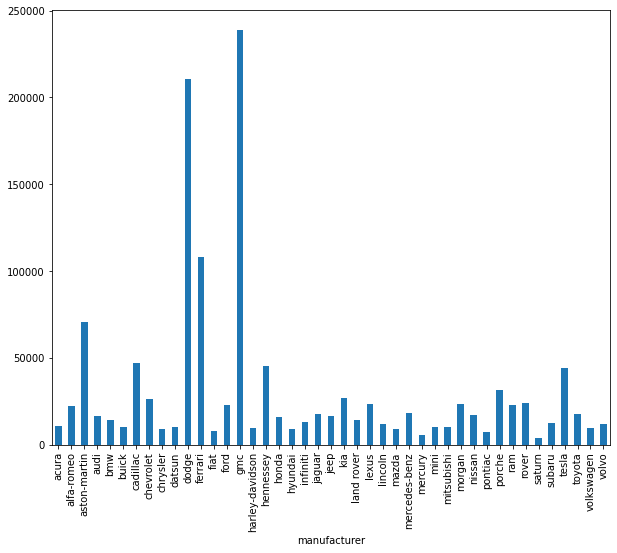

In [17]:
plt.figure(figsize = (10, 8))
cars.groupby("manufacturer").price.mean().plot.bar()

Dodge and GMC, which are not known to be "high end" vehicles, show a mean price that is larger than luxury brands like Aston-Martin and Ferrari. This seems od, so let's investigate.

In [18]:
cars.loc[cars["manufacturer"] == "dodge"]["price"].describe()

count        12547.00000
mean        210606.10489
std       22234124.01268
min              0.00000
25%           3481.50000
50%           8495.00000
75%          17995.00000
max     2490531375.00000
Name: price, dtype: float64

In [19]:
cars.loc[cars["price"] == 2490531375.00000]

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
67033,7194267441,2490531375,2014.00000,dodge,dart,good,4.00000,gas,112589.00000,clean,automatic,fwd,compact,sedan,red,"J.P. AUTO ENTERPRISE 3558 BUFORD HWY, SUITE B-...",ga


In [20]:
list(cars.loc[cars["price"] == 2490531375.00000]["description"])

['J.P. AUTO ENTERPRISE 3558 BUFORD HWY, SUITE B-100 DULUTH, GA 30096 CEL: 678-549-8671 www.jpcarsandbikes.com  Information VIN: 1C3CDFBB6ED695611 Make: Dodge Model: Dart  Model Year: 2014 Trim Package: SXT 4 Door Sedan  Body Style: Sedan  Engine: 2.4L I4 Fuel Type: Gasoline Drivetrain: FWD']

Seeing that there is no info regarding the price in the description, we should remove this data point as it is likely an error.

In [21]:
cars.drop(index = 67033, inplace = True)

In [22]:
cars.loc[cars["manufacturer"] == "gmc"]["price"].describe()

count        12782.00000
mean        238584.92974
std       24839841.83032
min              0.00000
25%           6850.00000
50%          14000.00000
75%          27990.00000
max     2808348671.00000
Name: price, dtype: float64

In [23]:
cars.loc[cars["price"] == 2808348671.00000]

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
207260,7189182927,2808348671,2020.00000,gmc,NaN,NaN,8.00000,gas,nan,clean,automatic,NaN,NaN,NaN,NaN,"WILL BUY YOU RLIFTED OR LOWERED TRUCK , SINGLE...",ca


In [24]:
list(cars.loc[cars["price"] == 2808348671.00000]["description"])

['WILL BUY YOU RLIFTED OR LOWERED TRUCK , SINGLE CABS SHORT BED , JEEPS LIFTED OR CUSTOM     WILL PAY CASH  PLEASE CALL US     (209)544-1388']

Seeing that there is no info regarding the price in the description, we should remove this data point as it is likely an error.

In [25]:
cars.drop(index = 207260, inplace = True)

In [175]:
#cars["manufacturer"].fillna("MISSING", inplace = True)
#sorted(list(cars["manufacturer"].unique()))

In [26]:
colors = ["k", "b", "g", "m", "y", "y", "r", "r", "r", "r", "b", "r", "g", "g", "r", "r", "r", "r", "b", "c", "b", "m", 
         "r", "c", "m", "b", "r", "b", "y", "r", "m", "b", "m", "b", "r", "y", "r", "m", "r", "b", "r", "b", "y", "w"]

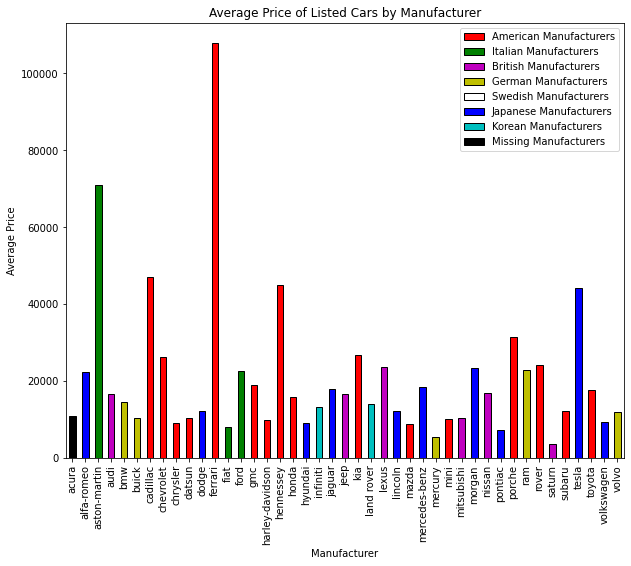

In [27]:
plt.figure(figsize = (10, 8))
cars.groupby("manufacturer").price.mean().plot.bar(color = colors, edgecolor = "k")
plt.ylabel("Average Price")
plt.xlabel("Manufacturer")
american = mpatches.Patch(facecolor = "r", edgecolor = "k", label = "American Manufacturers")
italian = mpatches.Patch(facecolor = "g", edgecolor = "k", label = "Italian Manufacturers")
british = mpatches.Patch(facecolor = "m", edgecolor = "k", label = "British Manufacturers")
german = mpatches.Patch(facecolor = "y", edgecolor = "k", label = "German Manufacturers")
swedish = mpatches.Patch(facecolor = "w", edgecolor = "k", label = "Swedish Manufacturers")
japanese = mpatches.Patch(facecolor = "b", edgecolor = "k", label = "Japanese Manufacturers")
korean = mpatches.Patch(facecolor = "c", edgecolor = "k", label = "Korean Manufacturers")
missing = mpatches.Patch(facecolor = "k", edgecolor = "k", label = "Missing Manufacturers")
plt.title("Average Price of Listed Cars by Manufacturer")
plt.legend(handles = [american, italian, british, german, swedish, japanese, korean, missing])

In [29]:
cars

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
0,7184791621,6995,2000.00000,gmc,new sierra 1500,excellent,8.00000,gas,167783.00000,clean,automatic,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,mn
1,7184773187,8750,2013.00000,hyundai,sonata,excellent,4.00000,gas,90821.00000,clean,automatic,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,mn
2,7193375964,10900,2013.00000,toyota,prius,good,4.00000,hybrid,92800.00000,clean,automatic,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,ct
3,7195108810,12500,2003.00000,mitsubishi,lancer,good,4.00000,gas,nan,clean,manual,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",nm
4,7184712241,16995,2007.00000,gmc,sierra classic 2500hd,good,8.00000,diesel,254217.00000,clean,automatic,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423852,7184919761,1600,2006.00000,hyundai,sonata,fair,6.00000,gas,159980.00000,clean,automatic,fwd,NaN,sedan,blue,Motor runs and drives good. Transmission shift...,mn
423853,7184844576,9000,2003.00000,toyota,sequoia limited,excellent,8.00000,gas,160000.00000,clean,automatic,4wd,full-size,SUV,green,"2 owner 0 rust not from here... Leather ,roof ...",mn
423854,7184805809,700,1994.00000,ford,f-150,fair,6.00000,gas,212000.00000,clean,manual,rwd,NaN,NaN,green,I'm selling this beautiful old pickup that I j...,mn
423855,7184791927,3800,1999.00000,lincoln,town car,excellent,8.00000,gas,160000.00000,clean,automatic,rwd,NaN,sedan,NaN,1999 *** Lincoln Town Car 4dr Sdn Signature Se...,mn


In [179]:
pd.get_dummies(cars["condition"])

,excellent,fair,good,like new,new,salvage
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
423852,0,1,0,0,0,0
423853,1,0,0,0,0,0
423854,0,1,0,0,0,0
423855,1,0,0,0,0,0
